<a href="https://colab.research.google.com/github/KevinTheRainmaker/Hanbit-HonGong-ML-DL/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<선형 회귀>**
### k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용하여 여러 가지 선형 회귀 모델을 만들어본다.

## k-최근접 이웃의 한계

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

> 데이터를 훈련세트와 테스트 세트로 분할
- 특성 데이터는 2차원 배열로 변환

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 분할
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# 2차원 배열로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

> k를 3으로 하는 최근접 이웃 모델을 훈련

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [5]:
# 길이가 50cm인 농어 무게 예측 by k-최근접 이웃 회귀
print(knr.predict([[50]]))

[1033.33333333]


> 실제 농어의 무게는 1,033.33...g보다 훨씬 많이 나간다고 한다. 어디서 문제가 생겼을까?

- 훈련 세트와 50cm의 농어, 그리고 이 농어의 최근접 이웃을 산점도에 표시해보자.
- kneighbors() 메서드 사용

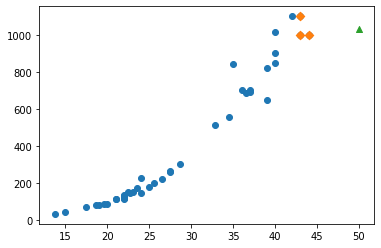

In [6]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 표시
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker = '^')
plt.show()

- 50cm 농어 데이터가 훈련 세트의 범위를 넘어갔기 때문에, 가장 가까운 이웃이 훈련 세트에서의 최대값인 45 부근 데이터들이 되게 된다.
- 이런 이유로, k-최근접 이웃 회귀는 새로운 샘플이 훈련 세트의 범위를 초과하면 엉뚱한 값을 예측하게 될 수 있다.
- 예를 들어, 위와 같은 경우 100cm 짜리 농어 또한 1,033g으로 예측했을 것이다. 

- k-최근접 이웃을 사용해 이 문제를 해결하려면, 가장 큰 농어가 포함되도록 훈련 세트를 다시 만들어야 한다.
- 하지만 이와 같은 방법을 사용할 경우, 새로운 데이터가 생겨날 경우 다시 훈련 세트를 수정해주어야 하며, 정확도 또한 그렇게 높지않을 것이다.

## 선형 회귀
선형 회귀(Linear Regression)는 널리 사용되는 대표적인 회귀 알고리즘이다. 비교적 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘 중 하나이다.
선형이란 말에서 짐작할 수 있듯이 특성이 하나인 경우 해당 특성을 가장 잘 설명할 수 있는 직선을 학습하는 알고리즘이다.

특성을 가장 잘 설명하는 직선은 결정계수가 1에 가까운 직선을 말한다.

> 사이킷런은 고맙게도, sklearn.linear_model 패키지 아래에 LinerRegression 클래스로 선형 회귀 알고리즘을 구현해 두었다.
우리는 이 클래스의 객체를 만들어 훈련하도록 하겠다.

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어 무게 예측 진행
print(lr.predict([[50]]))

[1241.83860323]


- k-최근접 이웃 회귀 모델과 비교했을 때 선형 회귀는 50cm 농어의 무게를 상당히 높게 예측했음을 확인 할 수 있다.


- 죄표평면 상에 하나의 직선을 그리려면 기울기와 절편이 필요하다.
$$y = ax + b$$
여기서 x를 농어의 길이, y를 농어의 무게라 하면, 농어의 길이와 무게 사이의 상관관계를 나타내는 직선을 그릴 수 있다.


- 여기서 LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef\_와 intercept\_ 속성에 저장되어 있다. 

- 이러한 coef\_와 intercept\_를, 머신러닝 알고리즘이 찾은 값이라는 의미로 **모델 파라미터(model parameter)**라고 부른다. 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 과정으로, 이를 **모델 기반 학습**이라고 부른다. 앞서 사용한 k-최근접 이웃에서처럼 모델 파라미터 없이 훈련 세트를 저장하는 것이 훈련의 전부인 경우는 **사례 기반 학습**이라고 한다.

In [10]:
print(lr.coef_, lr.intercept_) # coef_ == coefficient (계수)

[39.01714496] -709.0186449535477


- 농어의 길이 15에서 50까지를 직선으로 그려보도록 하자. 이 직선을 그리기 위해서는 앞서 구한 기울기와 절편을 이용하면 된다.
- 비교를 위해 산점도 또한 동시에 그려보도록 하겠다.


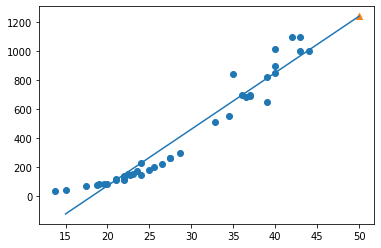

In [11]:
# 1차 방정식 그래프
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 훈련 세트 산점도
plt.scatter(train_input, train_target)

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

plt.show()

> 이제 훈련 세트의 범위를 벗어난 농어의 무게도 예측이 가능하게 되었다.

- 모델이 농어의 무게를 정확하게 예측하고 있는지 확인하기 위해, 훈련 세트와 테스트 세트에 대한 $R^2$ 점수를 확인해보도록 하자.

In [12]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.9398463339976039
0.8247503123313558


> **점수가 전반적으로 그닥 높지는 않다.** 

이는 '직선'을 회귀에 사용했기 때문인데, 농어의 무게는 음수가 될 수 없는 반면, 직선 방정식에 의하면 아주 작은 농어의 무게는 음수가 될 것이다.

## 다항 회귀

정확도를 조금 더 올리기 위해 우리는 사용 방정식의 차수를 올릴 수 있다. 즉, 1차 방정식이 아닌 2차 방정식을 사용하면 정확도가 더 올라간다는 이야기이다.

이러한 2차방정식의 그래프를 그리기 위해서는 길이를 제곱한 항이 훈련 세트에 추가되어야 한다. 이는 **넘파이**를 이용하면 간단하게 만들 수 있다.

In [13]:
train_poly = np.column_stack((train_input**2, train_input)) # 넘파이 브로드캐스팅이 적용됨
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


> 원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났음을 확인할 수 있다.

- train_poly를 사용해 선형 회귀 모델을 다시 훈련해보도록 하자.
- 여기서 주목할 점은, 2차 방정식의 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다는 것이다. 목표하는 값은 어떤 그래프를 사용하든지 바꿀 필요가 없기 때문이다

In [14]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 테스트할 때는 농어 길이의 제곱과 원래 길이를 함께 넣어줘야 한다

[1573.98423528]


> 기존 선형 회귀에서보다 더 높은 값을 무게로 예측하였음을 확인할 수 있다.

- 이 모델이 훈련한 계수와 절편을 출력해보자.

In [15]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


- **$무게 = 1.014 * 길이^2 - 21.558 * 길이 + 116.05$**

이러한 방정식을 **다항식 (polynimial)**이라 부르며, 다항식을 사용한 회귀를 **다항 회귀 (polynomial regression)**이라 부른다.

- 이 2차 방정식의 계수와 절편 a,b,c를 알았으니 이전과 동일하게 훈련 세트의 산점도에 그래프로 그려보도록 하자.

- 짧은 직선을 이어서 그리면 곡선처럼 그릴 수 있다는 것을 이용하여 1씩 끊어서 그려보도록 하겠다.

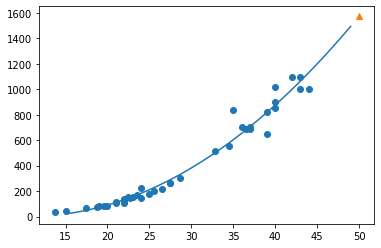

In [16]:
# 구간별 직선을 그리기 위한 정수 배열
point = np.arange(15,50) # 15에서 49

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 2차 방정식 그래프
plt.plot(point, 1.014*point**2 - 21.558*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1573.984], marker = '^')

plt.show()

> 전반적으로 괜찮은 그래프가 그려졌다.

- 다시 훈련 세트와 테스트 세트의 $R^2$ 점수를 확인해 보도록 하자.

In [17]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


> 점수가 기존에 비하면 크게 높아졌지만, 여전히 테스트 세트의 점수가 조금 더 높아 약간의 과소적합이 일어났음을 확인할 수 있다.

- 이를 해결하기 위해서는 모델을 조금 더 복잡하게 만들 필요가 있을 것 같다. 이는 다음에 이어하도록 하겠다.

## **5일차. 선형 회귀로 훈련 세트 범위 밖의 샘플 예측**
- k-최근접 이웃 회귀는 훈련 세트 범위 밖의 샘플을 예측할 수 없다. 실제 거리에 관계 없이 가지고 있는 샘플들의 데이터 중 가장 가까운 것의 값을 평균하여 예측하기 때문이다.

- 이를 해결하기 위해 우리는 선형 회귀를 사용했다. 선형 회귀는 훈련 세트에 잘 맞는 직선의 방정식을 찾는 방법으로, 사이킷런의 LinearRegression 클래스를 사용하면 k-최근접 이웃 알고리즘을 사용했을 때와 동일한 방식으로 모델을 훈련하고 예측에 사용할 수 있다.

- 가장 잘 맞는 직선의 방정식을 찾는다는 것은 최적의 기울기와 절편을 구한다는 의미로, 이 값들은 선형 회귀 모델의 coef\_와 intercept\_ 속성에 저장되어있다.

- 무게가 음수가 될 수 있는 점을 고치고 정확도를 올리기 위해 단순 1차 방정식이 아닌 2차 방정식을 이용해 다항 회귀를 진행 할 수 있었다.

- 조금 더 복잡한 모델을 사용함으로써 어느정도 문제를 해결하였자만, 여전히 과소적합 경향을 보이고 있다. 이 문제는 다음에 해결하도록 하겠다.

In [ ]:
## k-최근접 이웃의 한계
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

#print(knr.predict([[50]]))

import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# print(np.mean(train_target[indexes]))
# print(knr.predict([[100]]))

# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# print(lr.coef_, lr.intercept_)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# print(lr.score(train_input, train_target))
# print(lr.score(test_input, test_target))

## 다항 회귀
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

# print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)

# print(lr.predict([[50**2, 50]]))

# print(lr.coef_, lr.intercept_)

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# print(lr.score(train_poly, train_target))
# print(lr.score(test_poly, test_target))